<a href="https://colab.research.google.com/github/PauForestal/master_bdds/blob/main/M2_AI3_VallejoPaula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as ss
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

###**PRELIMINAR: LECTURA Y REVISIÓN DE DATAFRAME**


---

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PauForestal/master_bdds/main/Modulo2/datos_ventas.csv', sep=';',  decimal = ',')

In [3]:
df.head()

,Fecha_anual,Inversion,Ventas
0,1980,1.0,4.61
1,1981,1.5,5.18
2,1982,2.0,5.09
3,1983,2.5,5.44
4,1984,3.0,0.62


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha_anual  38 non-null     int64  
 1   Inversion    38 non-null     float64
 2   Ventas       38 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.0 KB


In [5]:
df.describe(include=['float64'])

,Inversion,Ventas
count,38.000000,38.000000
mean,10.250000,10.492895
std,5.556528,4.315321
min,1.000000,0.620000
25%,5.625000,7.565000
50%,10.250000,11.080000
75%,14.875000,14.032500
max,19.500000,17.450000


In [6]:
df.isnull().sum()

Fecha_anual    0
Inversion      0
Ventas         0
dtype: int64

El dataset no presenta valores nulos, según se puede observar en celda previa.

In [7]:
#Función que permite calcular las medidas de tendencia central, según la columna que se le pase.
def central_tendency(col):
    mean = f'MEAN: {round(df[col].mean(),2)}'
    median = f'MEDIAN: {df[col].median()}'
    print(f'Tendencia Central:\n{mean}\n{median}\n')

#Función para determinar las medidas de dispersión. Permite calcularlas según la columna que se quiera analizar.
def dispersion_measure(col):
    range = np.max(df[col]) - np.min(df[col])
    variance = round(np.var(df[col], ddof=1),2)
    standard_deviation = round(np.std(df[col], ddof=1),2)
    cv = '{:.2%}'.format(standard_deviation / np.mean(df[col]))
    print(f'Medidas de dispersión:\n\nRANGO: {range}\nVARIANZA: {variance}\nDESVIACIÓN ESTÁNDAR: {standard_deviation}\nCOEFICIENTE DE VARIACIÓN: {cv}\n')

#Función para determinar las medidas de posición. Permite calcularlas según la columna que se quiera analizar.
def position_measure(col):
  IQR = ss.iqr(df[col], interpolation='midpoint')
  #Q1 = np.percentile(df[col], 25, interpolation='midpoint')
  Q1 = df[col].quantile(0.25)
  #D3 = np.percentile(df[col], 90, interpolation='midpoint')
  D3 = df[col].quantile(0.3)
  print(f'Medidas de Posición:\nIQR: {IQR}\nQ1: {Q1}\nD3: {D3}\n')

#Función para determinar las medidas de distribución. Permite calcularlas según la columna que se quiera analizar.
def distribution_measure(col):
    asimetria = round(df[col].skew(), 3)
    curtosis = round(df[col].kurt(), 3)
    print(f'Medidas de distribución (o concentración y forma):\n\nASIMETRIA: {asimetria},\nCURTOSIS: {curtosis}\n')

def plots(col):
    mean=df[col].mean()
    median=df[col].median()
    mode=df[col].mode()

    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(df[col]);
    plt.title(f'Gráfico de Distribución de la variable {col}')
    plt.axvline(mean, color='red', label='Mean')
    plt.axvline(median, color='green', label='Median', linestyle = '--')
  
    plt.legend();

def boxplot(col):
    data = df[col]
    bp = plt.boxplot(data, showmeans=True)

    medians = [round(item.get_ydata()[0], 1) for item in bp['medians']]
    means = [round(item.get_ydata()[0], 1) for item in bp['means']]
    minimums = [round(item.get_ydata()[0], 1) for item in bp['caps']][::2]
    maximums = [round(item.get_ydata()[0], 1) for item in bp['caps']][1::2]
    q1 = [round(min(item.get_ydata()), 1) for item in bp['boxes']]
    q3 = [round(max(item.get_ydata()), 1) for item in bp['boxes']]
    fliers = [item.get_ydata() for item in bp['fliers']]
    lower_outliers = []
    upper_outliers = []

    for i in range(len(fliers)):
        lower_outliers_by_box = []
        upper_outliers_by_box = []
        for outlier in fliers[i]:
            if outlier < q1[i]:
                lower_outliers_by_box.append(round(outlier, 1))
            else:
                upper_outliers_by_box.append(round(outlier, 1))
        lower_outliers.append(lower_outliers_by_box)
        upper_outliers.append(upper_outliers_by_box)    
        
    stats = [medians, means, minimums, maximums, q1, q3, lower_outliers, upper_outliers]
    stats_names = ['Median', 'Mean', 'Minimum', 'Maximum', 'Q1', 'Q3', 'Lower outliers', 'Upper outliers']

    for j in range(len(stats)):
        print(f'{stats_names[j]}: {stats[j][i]}')

    print('\n')


In [8]:
#Iteración para identificar las columnas numéricas y excluir el id. Las columnas resultantes entran a la función anteriormente descrita, para tener una visión general de ellas.
for col, types in df.dtypes.items():
    if col != 'Fecha_anual' and types != 'object':
        print(f'ANÁLISIS DESCRIPTIVO DE {col.upper()}:\n')
        central_tendency(col)
        dispersion_measure(col)
        position_measure(col)
        distribution_measure(col)

ANÁLISIS DESCRIPTIVO DE INVERSION:

Tendencia Central:
MEAN: 10.25
MEDIAN: 10.25

Medidas de dispersión:

RANGO: 18.5
VARIANZA: 30.88
DESVIACIÓN ESTÁNDAR: 5.56
COEFICIENTE DE VARIACIÓN: 54.24%

Medidas de Posición:
IQR: 9.0
Q1: 5.625
D3: 6.55

Medidas de distribución (o concentración y forma):

ASIMETRIA: 0.0,
CURTOSIS: -1.2

ANÁLISIS DESCRIPTIVO DE VENTAS:

Tendencia Central:
MEAN: 10.49
MEDIAN: 11.079999999999998

Medidas de dispersión:

RANGO: 16.83
VARIANZA: 18.62
DESVIACIÓN ESTÁNDAR: 4.32
COEFICIENTE DE VARIACIÓN: 41.17%

Medidas de Posición:
IQR: 6.3149999999999995
Q1: 7.565
D3: 8.031

Medidas de distribución (o concentración y forma):

ASIMETRIA: -0.441,
CURTOSIS: -0.36



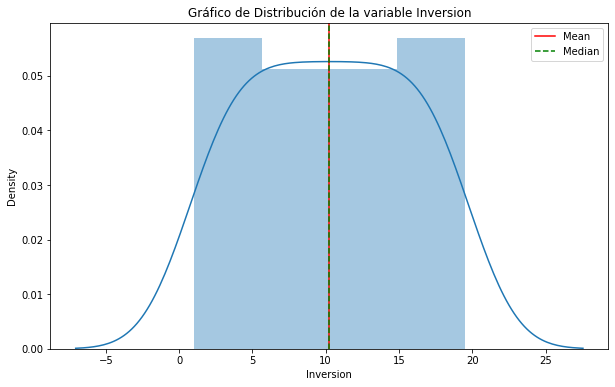

In [9]:
plots('Inversion')

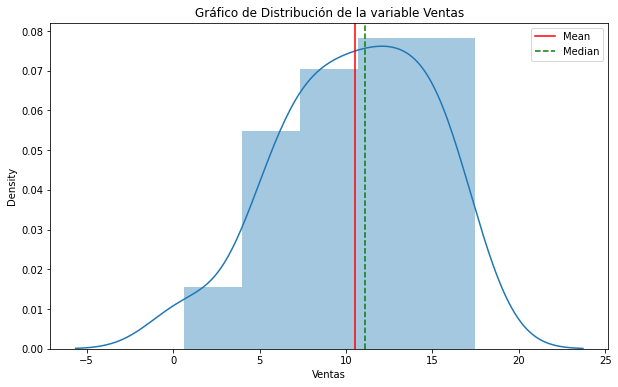

In [10]:
plots('Ventas')

Median: 10.2
Mean: 10.2
Minimum: 1.0
Maximum: 19.5
Q1: 5.6
Q3: 14.9
Lower outliers: []
Upper outliers: []




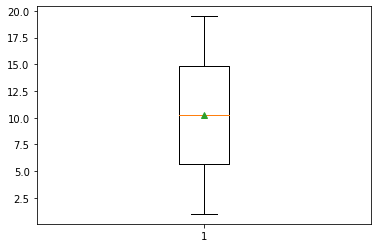

In [11]:
boxplot('Inversion')

Median: 11.1
Mean: 10.5
Minimum: 0.6
Maximum: 17.4
Q1: 7.6
Q3: 14.0
Lower outliers: []
Upper outliers: []




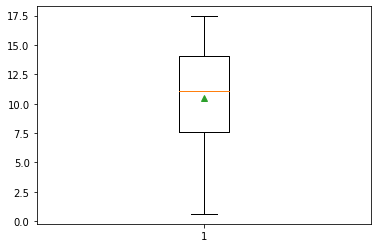

In [12]:
boxplot('Ventas')

El dataframe cuenta con una dimensión de 3 variables y 38 observaciones, y dice relación con las inversiones y ventas realizadas por una empresa entre los años 1980 y 2017. Sus variables son las siguientes:

- **Fecha_anual**: Esta variable indica el año en el que ocurre cada observación. Es una variable cuyo origen es del tipo continua pero en el uso del presente dataframe es una variable cualitativa ordinal. Asimismo, en función de su análisis es una variable categórica ya que sirve para clasificar el año en que ocurrieron las observaciones.

- **Inversion**: Esta variable se refiere a la inversión realizada en el periodo informado (entre 1980 y 2017). La inversión es una variable cuantitativa continua. En función del análisis de datos es una variable analítica.

* Al realizar un breve análisis descriptivo tenemos que es una variable cuya distribución es normal, y tanto su media como su mediana tienen el mismo valor por lo que es una variable Simétrica (se observa también al calular su asimetría que es igual a 0). En relación a su distribución tiene una forma platicúrtica ya que su curtosis es negativa. Lo anterior nos indica que los datos están dispersos o no concentrados hacia la media. 

* En relación a la dispersión de las observaciones de esta variable, tenemos que el coeficiente de variación es de 54,24% (esto representa cuánto varían los datos respecto de su media), es decir la inversión media es 10.25 millones de euros, moviéndose 5.56 millones de euros hacia arriba y hacia abajo (desviación estándar).

* Finalmente, y en relación a las medidas de posición, tenemos un rango intercuartil de 9 millones de euros, no observándose outliers en esta variable.


- **Ventas**: Esta variable se refiere a las ventas ocurridas en el periodo informado y al igual que la variable "Inversión" es Cuantitativa Continua y en función del análisis es analítica.

* En relación a sus estadísticos descriptivos esta variable presenta una distribución normal asimétrica negativa (es decir la cola de la distribución se alarga para valores inferiores a la media, o bien, las ventas tienden a concentrarse levemente más para valores bajo la media). La curtosis también es negativa mostrando una distribución platicúrtica de los datos, al igual que la inversión.

* El coeficiente de variación de esta variable es levemente menor que para la inversión, no obstante es alto igual, un 41,17% lo que indica que hay una alta dispersión de los datos, moviendose las ventas entre +- 4,32 millones de euros, con un promedio de 10.5 millones de euros aproximadamente para todo el periodo en evaluación.

* Al igual que la variable anterior, no se observan outliers.

Tanto las variables Inversion como Ventas están expresadas en millones de Euros.

### **OBSERVACIÓN DE VARIABLES MEDIANTE GRAFICO DE DISPERSIÓN**


---



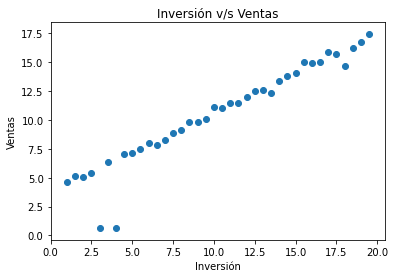

In [13]:
# raw data
inversion = df["Inversion"] 
ventas = df["Ventas"] 

# labels
plt.title("Inversión v/s Ventas")
plt.xlabel("Inversión")
plt.ylabel("Ventas")

# limits
plt.xlim(inversion.min()-1 , inversion.max()+1 )
plt.ylim(ventas.min()-1 , ventas.max()+1 )

plt.scatter(inversion, ventas)
plt.show()

A través de la gráfica anterior, se puede observar con bastante claridad que las variables Inversión y Ventas están fuertemente relacionadas, es así que en general, cuando la inversión (variable independiente o x) crece, las ventas (variable dependiente o y) también crecen. Esto permite determinar que el modelo de ajuste será el de Regresión Lineal Simple.

###**MODELO DE REGRESION LINEAL**

In [14]:
#Función para estimar parámetros b0 y b1 (coeficiente y pendiente)
def estimate_b0_b1(x, y):
    n = np.size(x)
    #Promedios de X y de Y
    mean_x, mean_y = np.mean(x), np.mean(y)

    #Sumatoria de XY y Sumatoria de XX
    sum_xy = np.sum((x - mean_x) * (y - mean_y))
    sum_xx = np.sum(x * (x - mean_x))

    #coeficientes de regresion
    b_1 = sum_xy / sum_xx
    b_0 = mean_y - b_1 * mean_x

    return(b_0, b_1)

#Funcion para graficar regresión lineal
def plot_regression(x, y, b):
    plt.figure(figsize=(9, 6))

    plt.scatter(x, y, color = "r", marker = "o", s=30, label='observed')

    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "b", label='fit')

    plt.title('Distribución de Inversión v/s Ventas')
    plt.xlabel('Inversión')
    plt.ylabel('Ventas')
    plt.legend(loc='best')
    plt.grid(linestyle='dotted')
    plt.text(16, 1.2, r'$y = 2.88 + 0.74x$')
    plt.show()

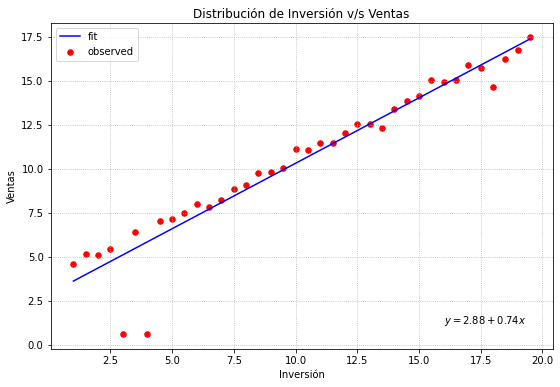

In [15]:
def main():
    #DATASET
    x = df['Inversion']
    y = df['Ventas']

    #Obtención de parámetros b0 y b1
    b = estimate_b0_b1(x, y)

    #Graficamos nuestra linea de regresion
    plot_regression(x, y, b)

if __name__== "__main__":
    main()

#### **Parámetros del Modelo**

Al ajustar a través del Modelo de Regresión Lineal Simple, obtenemos un modelo bastante ajustado, esto quiere decir que la relación que existe entre la
variable respuesta Y y la variable independiente X es lineal. Los parámetros obtenidos y su comprensión son los siguientes:

- **b0**: También conocido como la ordenada en el origen (o el valor que toma la variable Y, o Ventas, cuando X, o Inversión, vale 0). Este parámetro tiene un valor de 2.88 MM de Euros cuando la Inversión es 0.
- **b1**: También conocido como la pendiente de la recta (e indica cómo cambian las ventas al incrementar la inversión en una unidad), este parámetro al ser mayor que cero, indica que a medida que aumenta la Inversión, también aumentan las Ventas. Su valor es de 0.74 aprox.

In [16]:
b = estimate_b0_b1(df['Inversion'], df['Ventas'])
df['y_est'] = b[0] + b[1]*df['Inversion']

#### Parámetros adicionales

Covarianza:

---


In [17]:
covarianza = df.cov()["Inversion"]["Ventas"]
covarianza

22.92993243243243

La **covarianza** es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias. Es el dato básico para determinar si existe una dependencia entre ambas variables y además es el dato necesario para estimar otros parámetros básicos, como el coeficiente de correlación lineal o la recta de regresión (Wikipedia).

Cuando los valores altos de una de las variables suelen mayoritariamente corresponderse con los valores altos de la otra, y lo mismo se verifica para los pequeños valores de una con los de la otra, se corrobora que tienden a mostrar comportamiento similar lo que se refleja en un **valor positivo** de la covarianza, como en este caso en que su valor es de **22.9** mostrando la relación lineal positiva entre ambas variables.

Correlación y Matriz de Correlación:

---

In [18]:
# Correlacion 
correlacion = df.corr(method="pearson")["Inversion"]["Ventas"]
correlacion

0.9562823420491507

In [19]:
# Matriz de correlación
correlacion = df[['Inversion','Ventas']].corr()
correlacion.style.background_gradient(cmap='coolwarm').set_precision(3)

,Inversion,Ventas
Inversion,1.000,0.956
Ventas,0.956,1.000


El Coeficiente de Correlación Lineal (correlación) busca medir la dependencia lineal que existe entre las dos variables en análisis. Este coeficiente no tiene dimensión y tiene un valor dentro del intervalo entre -1 y 1.

La correlación entre Inversión y Ventas se observa visualmente en la matriz de correlación, donde la correlación de una variable consigo misma es 1 y con la otra, en este caso, toma un valor cercano a 1 (0.956)

Dado que el coeficiente de correlación es positivo (r=0.956), esto indica que existe una relación directa entre las variables Inversión y
Ventas. Además, dado que su valor es próximo a 1, indica una dependencia lineal muy fuerte.

Coeficiente de Determinación:

---

In [20]:
coeficiente_determinacion = correlacion ** 2
coeficiente_determinacion

,Inversion,Ventas
Inversion,1.000000,0.914476
Ventas,0.914476,1.000000


El coeficiente de determinación indica la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo.

En este caso, el Coeficiente de Determinación es de 0.91 lo que puede interpretarse como que la variable predictora (X) explica en un 91% la variación de Y (ventas). Se concluye que el modelo de Regresión Lineal es robusto.

###**ANÁLISIS DEL MODELO A TRAVÉS DE LA SUMA DE CUADRADOS DE LOS ERRORES (SCE)**

Este método consiste en minimizar la suma de los cuadrados de los errores y es utilizado para estimar los parámetros b0 y b1 definidos previamente. De esta manera se obtiene aquella recta que mejor se ajusta a la nube de puntos de la distribución bidimensional obteniendo un menor error en las predicciones.

In [21]:
df['Error'] = df['Ventas'] - df['y_est'] #Diferencia entre los valores reales de venta y los estimados por el modelo
df['Error_2'] = df['Error']**2 # Cuadrado de los errores
df['yest_ymean_2'] = (df['y_est'] - df['Ventas'].mean())**2 # Diferencia entre los valores estimados de venta y el promedio de venta

In [22]:
df.head()

,Fecha_anual,Inversion,Ventas,y_est,Error,Error_2,yest_ymean_2
0,1980,1.0,4.61,3.623198,0.986802,0.973777,47.192728
1,1981,1.5,5.18,3.994533,1.185467,1.405331,42.228701
2,1982,2.0,5.09,4.365868,0.724132,0.524367,37.540453
3,1983,2.5,5.44,4.737203,0.702797,0.493923,33.127985
4,1984,3.0,0.62,5.108538,-4.488538,20.146975,28.991296


In [23]:
SCE = df['Error_2'].sum()
SCE

58.927288456067394

La suma de cuadrados de los errores puede oscilar entre 0 y cualquier valor positivo. Si esta suma da 0, el modelo de regresión se ajusta perfectamente a los datos; cuanto mayor sea su valor, ello significará que más erróneas son las predicciones de la ecuación de regresión y, por lo tanto, peor su bondad como modelo predictivo. La ausencia de un techo numérico para este índice puede resultar en la dificultad para interpretar en la práctica este valor por si solo. Por ejemplo, la SCE de este ejercicio es 58.92728.

Un índice, por tanto, derivado de la SCE es el que se obtiene como media aritmética del cuadrado de los errores de predicción o Varianza de los errores, que no es más que SCE dividido por el número de observaciones (n). Ambos índices descritos anteriormente son, por sí solos, dificultosos a la hora de intrepretar.

Para superar el problema interpretativo de estos índices, se agrega otro punto de referencia conocido como **la igualdad de la descomposición de la Varianza de Y**, la cual se deriva del axioma que establece la puntuación observada en la variable de respuesta es igual a la predicha según el modelo de regresión más el error de predicción cometido (Y = a + bX + e). A partir de esta igualdad se deriva algebraicamente que:

S2y = S2yest + S2yx

Estos términos se explican y calculan a continuación.

In [24]:
#Varianza de los errores (o residuales): Suma del cuadrado de los errores dividido por el número de observaciones
S2yx = df['Error_2'].sum() / len(df['Error_2'])
S2yx

1.5507181172649314

In [25]:
#Varianza de puntuaciones predichas: Suma del cuadrado de las diferencias entre valor estimado y la media de Y dividido por n
S2yest = df['yest_ymean_2'].sum() / len(df['yest_ymean_2'])
S2yest

16.58122876639157

In [26]:
#Descomposición de la varianza de Y (Ventas) en la suma de varianza de residuales y varianza de valores estimados por modelo
S2Y = S2yest + S2yx
S2Y

18.1319468836565

Así la varianza en las puntuaciones de la variable de respuesta (S2Y) es igual a la varianza explicada por el modelo de regresión (o varianza de las puntuaciones predichas, S2yest) más la varianza no explicada por el modelo de regresión (o varianza de los errores o residuales, S2yx)

In [27]:
#S2Y = S2yest + S2yx o bien la Varaianza de Y (o ventas) es la suma de la varianza de los errores y la varianza de la regresion o predicciones
R2 = S2yest / (S2yx + S2yest) #Coeficiente de determinación
R2

0.9144759177150086

El Coeficiente de Determinación (R2) representa la proporción de la Varianza de Y (S2Y) explicada por la variable independiente en el modelo de regresión ajustado a los datos (X). Este coeficiente siempre oscila entre 0 y 1 por lo que mientras más cerca a 1 sea, indica mejor bondad de ajuste del modelo de regresión. **El valor obtenido para el Coeficiente de Determinación, R2, es 0.91 indicando una excelente Bondad de Ajuste del Modelo**

### **EVALUACIÓN DEL MODELO DE REGRESIÓN LINEAL**


---



In [28]:
# Modelo matemático utilizando el módulo stats de la librería scipy
pendiente, coeficiente, pearson, p, error = ss.linregress(df['Inversion'], df['Ventas'])
print(f'La pendiente de la regresión lineal es: {pendiente}\nEl coeficiente es: {coeficiente}\nLa correlación con método Pearson es: {pearson}\nEl valor de p (p-value) es: {p}\nEl error cuadrático medio es: {error}')

#Función para predecir ventas según la inversión
def prediccion_Ventas(Inversion):
    return coeficiente + (Inversion * pendiente)

La pendiente de la regresión lineal es: 0.7426698763540868
El coeficiente es: 2.8805285042127142
La correlación con método Pearson es: 0.9562823420491505
El valor de p (p-value) es: 8.25497955552195e-21
El error cuadrático medio es: 0.0378532029452961


Para predecir las Ventas según la Inversión realizada se debe aplicar la función definida previamente "prediccion_Ventas".

Por ejemplo, las Ventas obtenidas para una inversión de 7 millones de euros son de 8.079 millones de euros, tal como se puede ver a continuación:

In [29]:
prediccion_Ventas(7.0)

8.079217638691322

### **CONCLUSIONES**
####**Análisis Unidimensional**
---
El análisis realizado constó de dos grandes pasos, el primero un **análisis unidimensional** que básicamente permite observar las variables por separado, y evaluarlas según un breve análisis descriptivo que incluye medidas de tendencia central, dispersión, distribución y posición. Al respecto se puede mencionar que tanto la variable Ventas como Inversión tienen una distribución normal, la primera levemente asimétrica negativa (datos distribuídos mayormente antes de la media) y la segunda una distribución normal simétrica. No se observaron outliers en el dataframe.

####**Análisis Bidimensional**
---
El segundo paso constó de un **análisis bidimensional**, que permitió relacionar ambas variables cuantitativas continuas del dataset, es decir Inversión (Variable independiente) y Ventas (Variable dependiente). 

A través de este análisis se pudo determinar que ambas variables están fuertemente relacionadas (coeficiente de correlación de Pearson sobre 0.95) a través de una relación lineal positiva, es decir a medida que aumenta la Inversión, también aumentan las ventas. 

El modelo ajustado para estas variables es **Y = 2.88 + 0.74X**, donde se puede deducir que para un nivel de inversión 0, las ventas toman un valor de 2.88 millones de euros, asimismo por cada incremento en una unidad de la inversión, las ventas aumentan en una proporción de 0.74 millones de euros.

Finalmente de acuerdo al Coeficiente de Determinación, cuyo valor es mayor al 91%, se puede concluir que la Variable Independiente (Inversión) es capaz de explicar en un 91% la variación de los valores estimados de Ventas.

Finalmente se obtuvo, a través del uso de Scipy, el valor de p (p-value). Este valor es notoriamente cercano a cero por lo que se comprueba o confirma que existe una fuerte relación entre la Inversión y las Ventas.